# Cross Validation, Validación Cruzada

## Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/work/Happiness_Index_report_2018-2019.csv",delimiter=",",skiprows=8)

In [ ]:
data.head(1)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.35,0.517,0.361,0.0,0.158,0.025


In [ ]:
data=data.drop(columns=["Overall rank","Country or region"])

In [ ]:
data.shape

(312, 8)

In [ ]:
data.head(1)

,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,3.203,0.35,0.517,0.361,0.0,0.158,0.025


## Cargando los algoritmos

In [ ]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score


In [ ]:
rs=23
y = data['Score']
X = data.drop(columns=['Score'])
# Saving feature names for later use
feature_list = list(X.columns)
# Convert to numpy array
X = np.array(X)
# Using Skicit-learn to split data into training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = rs)
#val_features, test_features2, val_labels, test_labels2 = train_test_split(features, labels, test_size = 0.45, random_state = rs)


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
rfm = RandomForestRegressor(random_state = rs)
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_train)
acc = r2_score(y_pred, y_train)

In [ ]:
acc

0.9719742767383283

## Cross Validation

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state= rs)


In [ ]:
val_scores = cross_val_score(estimator=rfm,  X=X_train, y=y_train, cv=10)
val_scores

array([0.73851215, 0.73448364, 0.80051109, 0.80650435, 0.83659977,
       0.76440938, 0.8339768 , 0.76278732, 0.69128551, 0.85830814])

In [ ]:
val_scores.mean()


0.782737816421194

## Ajuste de Hiperparametros: Grid Search

In [ ]:
rs=137
labels = data['Score']
features=data.drop(columns=['Score'])
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)
val_features, test_features2, val_labels, test_labels2 = train_test_split(features, labels, test_size = 0.45, random_state = rs)


In [ ]:
rs=137
def make_RF(pr=True,plot2=True,ML="RF"):
    verv=2
#===========================================================================================================MACHINE LEARNING REGRESSORS============================
    if ML=="RF":
        rf_param_grid = {
            'n_estimators':[100, 200, 400, 600, 800, 1000],
            'max_depth': [None, 10, 15, 20, 25, 30]}
        rfm = RandomForestRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = RandomForestRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="GB":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.5],
            'max_depth': [10, 15, 20, 25, 30]}
        rfm = GradientBoostingRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = GradientBoostingRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="AB":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'learning_rate': [0.01, 0.05, 0.075, 0.1, 0.5]}
        rfm = AdaBoostRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = AdaBoostRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)

    if ML=="ET":
        rf_param_grid = {
            'n_estimators':[200, 400, 600, 800, 1000],
            'max_depth': [10, 15, 20, 25, 30]}
        rfm = ExtraTreesRegressor(random_state = rs)
        grid_rfe = GridSearchCV(estimator = rfm, param_grid = rf_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = verv)
        grid_rfe.fit(train_features, train_labels)
        best=grid_rfe.best_params_
        print("Best parameters found: ",best)
        print("Lowest RMSE found: ", np.sqrt(np.abs(grid_rfe.best_score_)))
        # max_features={"auto", "sqrt", "log2"}
        rf = ExtraTreesRegressor(**best,random_state = rs) #(n_estimators = ne, random_state = rs,max_features="auto")
        # Train the model on training data
        rf.fit(train_features, train_labels)
#==================================================================================================================================================================

    # Use the Machine learning algorithm predict method on the test data
    train_predictions = rf.predict(train_features)
    test_predictions = rf.predict(test_features)
    validation_predictions = rf.predict(val_features)
    all_predictions = rf.predict(features)
    # Calculate the absolute and square errors
    
    # Get numerical feature importances
    importances = rf.feature_importances_.astype(np.float64)
    # List of tuples with variable and importance
    #feature_importances = np.array([[feature, round(importance.astype("float64"), 2)] for feature, importance in zip(feature_list, importances)])
    # Sort the feature importances by most important first
    feature_importances = pd.DataFrame(np.array([feature_list,np.round(importances,2)]).T,
                                       columns=["Features","Importances"]).sort_values(by="Importances",ascending=False)
    feature_importances["Importances"]=feature_importances["Importances"].astype(np.float64)
    feature_importances["Importances_CUMSUM"]=feature_importances["Importances"].cumsum()
    feature_importances2=feature_importances[:10]

    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(mean_absolute_error(all_predictions,labels), 4))
        # Print out the root mean square error (rmse)
        print('Root Mean Square Error (RMSE):', round(np.sqrt(mean_squared_error(all_predictions,labels)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(all_predictions,labels), 4))
        # Print out the r2_score
        print('R2-score:', round(r2_score(all_predictions,labels), 4))
        # Print out the correlation coefficient
        print('Correlation coeficient:', round(np.corrcoef(all_predictions,labels)[0][1], 2))
        # Print out the feature and importances 
        #print(feature_importances)
    if plot2:
        plt.figure(figsize=(18,6))
        plt.subplot(121)
        plt.barh(feature_importances2["Features"][::-1], feature_importances2["Importances"][::-1]*100, label="Feature importances (RF)", color="b", alpha=0.5)
        plt.xlabel("Importances (%)",fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15);
        plt.legend(ncol=2, loc="lower right", frameon=True); plt.grid();
        plt.subplot(122)
        plt.scatter(val_labels,validation_predictions,color='k',s=80,marker='^', facecolors='none', label="Validation dataset")
        plt.scatter(train_labels,train_predictions,color='b',s=40,marker='o', facecolors='none', label="Train dataset")
        plt.scatter(test_labels,test_predictions,color='r',s=40,marker='s', facecolors='none', label="Test dataset")
        #plt.scatter(labels,all_predictions,color='k',s=40,marker='P', facecolors='none', label="All dataset")
        #plt.plot(np.linspace(0.23,1.12,5),np.linspace(0.23,1.12,5),c='k')
        plt.xlabel("Original data",fontsize=15); plt.ylabel("Predictions",fontsize=15); plt.xticks(fontsize=15); plt.yticks(fontsize=15);
        plt.legend(fontsize=15,ncol=1,loc="lower right",frameon=True); plt.grid();
        plt.show()
    return feature_importances[feature_importances["Importances"]>0], train_predictions, train_labels, test_predictions, test_labels, validation_predictions, val_labels, all_predictions, labels


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=400; total time=   0.7s
[CV] END ...................max_depth=None, n_e

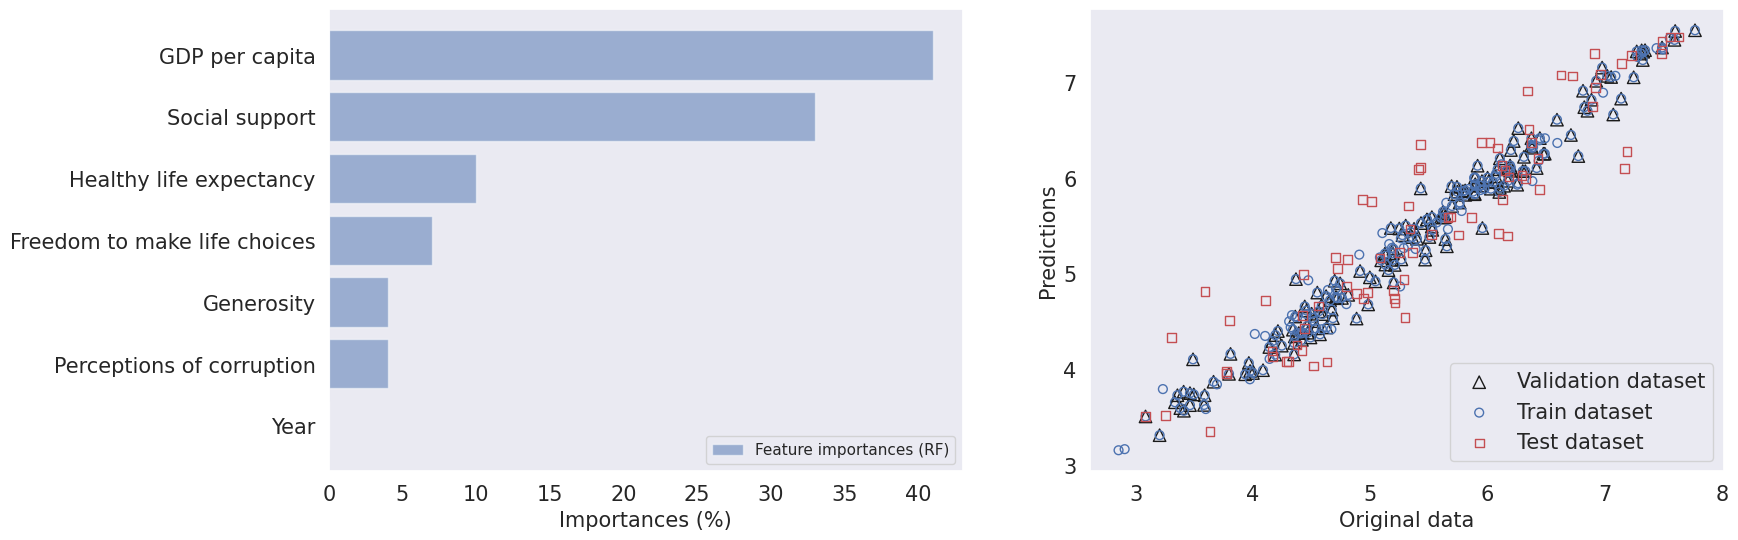

In [ ]:
Resultados_RF=make_RF(pr=True,plot2=True,ML="RF")


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [ ]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

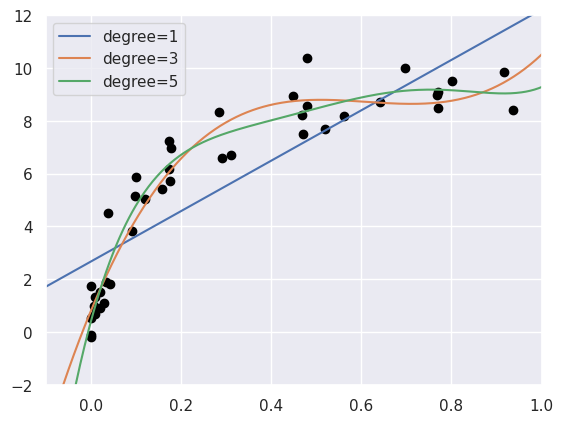

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [ ]:
!pip install sklearn.learning_curve

ERROR: Could not find a version that satisfies the requirement sklearn.learning_curve (from versions: none)
ERROR: No matching distribution found for sklearn.learning_curve
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

ModuleNotFoundError: No module named 'sklearn.learning_curve'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>